#  Main Experiment: Event Time DiD + Event Study Image Analysis


In [ ]:
import pandas as pd
data=pd.read_csv("main_df.csv")

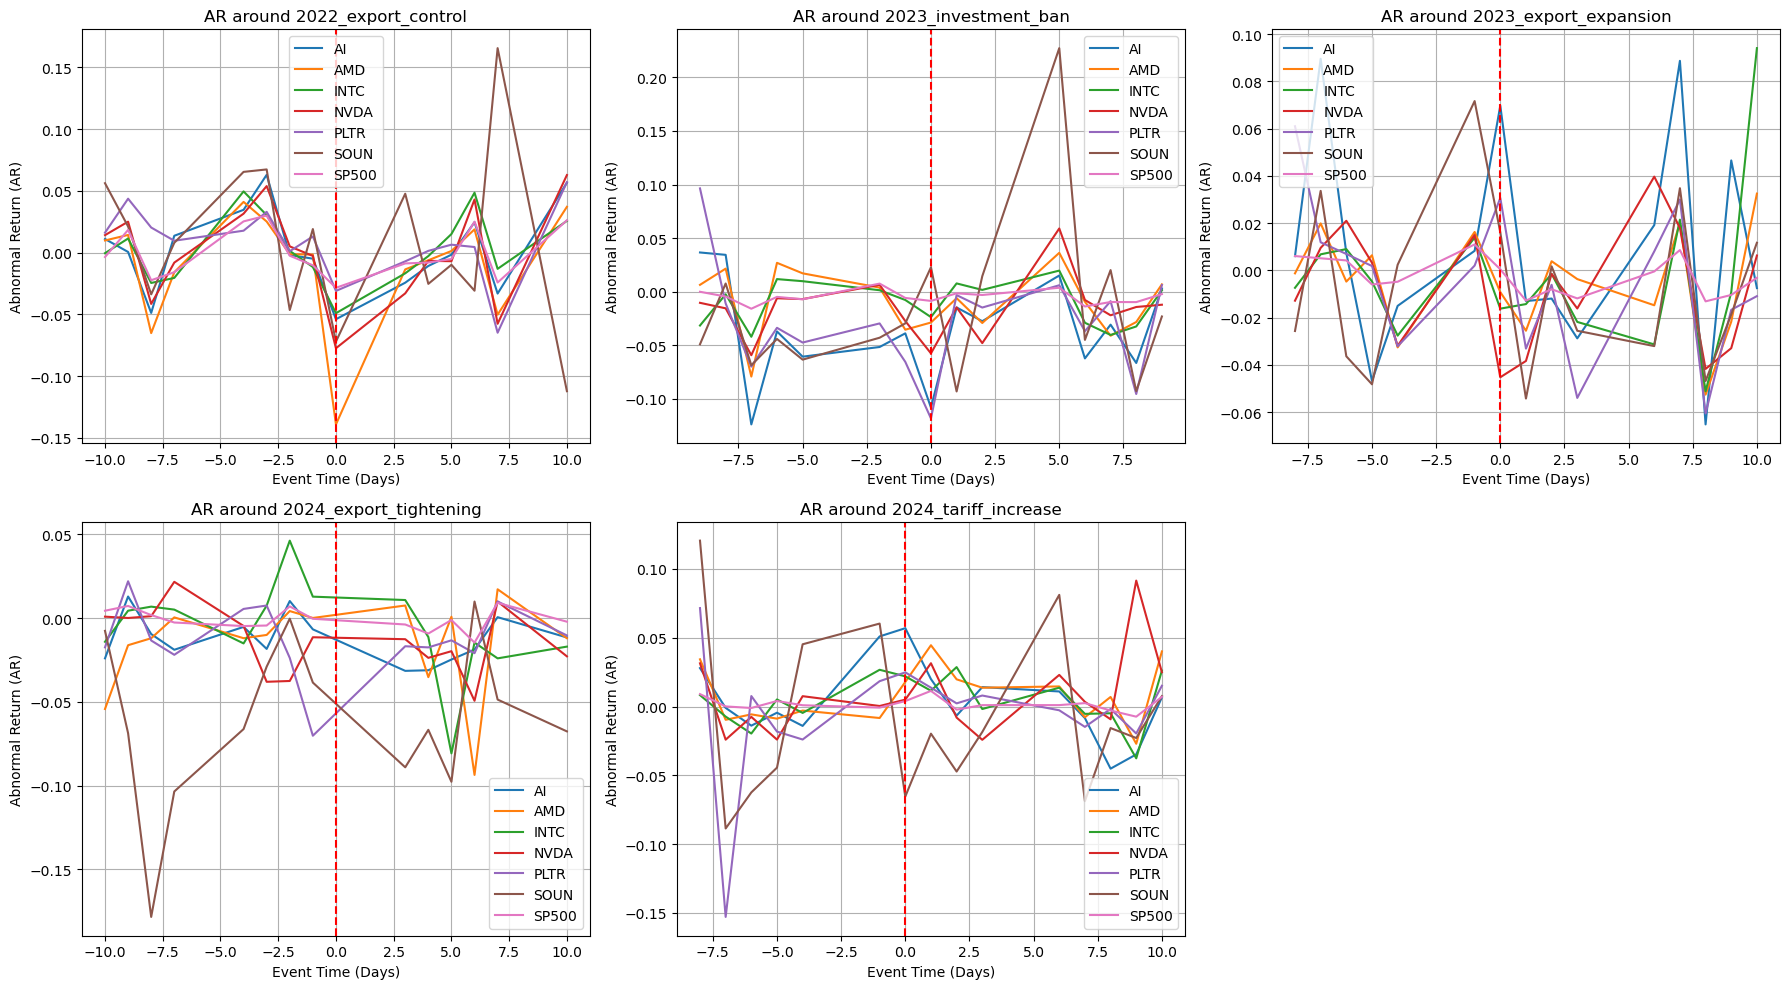

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 事件字典
event_dict = {
    "2022_export_control": pd.to_datetime("2022-10-07"),
    "2023_investment_ban": pd.to_datetime("2023-08-09"),
    "2023_export_expansion": pd.to_datetime("2023-10-17"),
    "2024_export_tightening": pd.to_datetime("2024-03-29"),
    "2024_tariff_increase": pd.to_datetime("2024-05-14"),
}

# 所有 ticker（自动提取）
all_tickers = sorted(data['ticker'].unique())

# 图像设置
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# 绘图
for i, (event_id, event_date) in enumerate(event_dict.items()):
    ax = axes[i]
    for ticker in all_tickers:
        sub_df = data[
            (data['event_id'] == event_id) &
            (data['ticker'] == ticker) &
            (data['event_time'].between(-10, 10))
        ].sort_values('event_time')
        sns.lineplot(x='event_time', y='abnormal_return', data=sub_df, label=ticker, ax=ax)

    ax.axvline(0, color='red', linestyle='--')
    ax.set_title(f"AR around {event_id}")
    ax.set_xlabel("Event Time (Days)")
    ax.set_ylabel("Abnormal Return (AR)")
    ax.grid(True)

# 图例只显示在最后一个子图
handles, labels = ax.get_legend_handles_labels()
axes[-1].legend(handles, labels, loc='upper right')

# 删除多余 subplot（因为只有5个事件）
if len(event_dict) < len(axes):
    for j in range(len(event_dict), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
